LSTM 기반의 온실내 온도 예측 - 빵형

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

# Load Dataset

In [2]:
data = pd.read_csv('./climate_data.csv')
data.head()

,seq_no,inside_temp,Outside_temp,outside_RH,Radiation_intensity,Rail_Heating,AHU_Cooling,Fan_speed,inlet_vent_position
0,1,19.8,24.1,100,0.0,0.0,-3.50,440.0,0.0
1,2,19.7,24.2,100,0.0,0.0,-3.50,294.3,0.0
2,3,19.6,24.1,100,0.0,0.0,-3.50,283.3,0.0
3,4,19.6,24.2,100,0.0,0.0,-3.25,272.3,0.0
4,5,19.5,24.0,100,0.0,0.0,-3.75,261.3,0.0


# Compute Mid Price

In [3]:
#high_prices = data['High'].values
#low_prices = data['Low'].values
mid_prices =  data['inside_temp'].values

# Create Windows

In [4]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

# Normalize Data

In [5]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((3972, 50, 1), (441, 50, 1))

# Build a Model

In [6]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


# Training

In [7]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=5)

Epoch 1/5
398/398 [==============================] - 8s 16ms/step - loss: 0.0022 - val_loss: 7.9165e-04
Epoch 2/5
398/398 [==============================] - 6s 15ms/step - loss: 5.9483e-04 - val_loss: 5.3777e-04
Epoch 3/5
398/398 [==============================] - 6s 15ms/step - loss: 3.9616e-04 - val_loss: 2.3574e-04
Epoch 4/5
398/398 [==============================] - 6s 15ms/step - loss: 3.3889e-04 - val_loss: 9.2962e-04
Epoch 5/5
398/398 [==============================] - 6s 15ms/step - loss: 3.1863e-04 - val_loss: 4.2064e-04


# Prediction

14/14 [==============================] - 1s 7ms/step


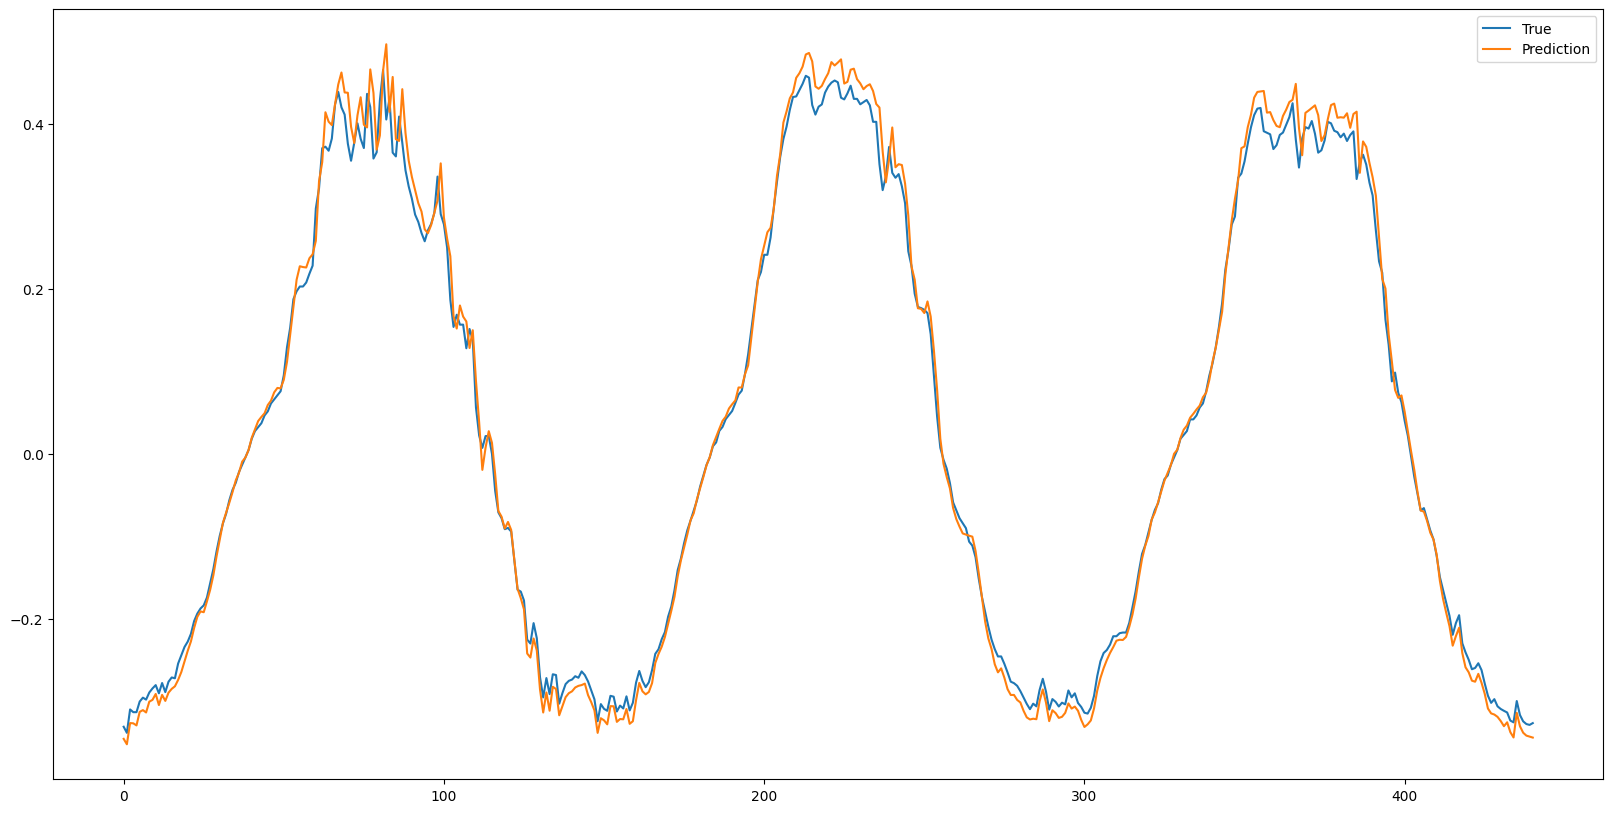

In [8]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()